In [ ]:
import tensorflow as tf
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Monta o drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carrega a base de dados
base_dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nba.csv', encoding='utf-8')

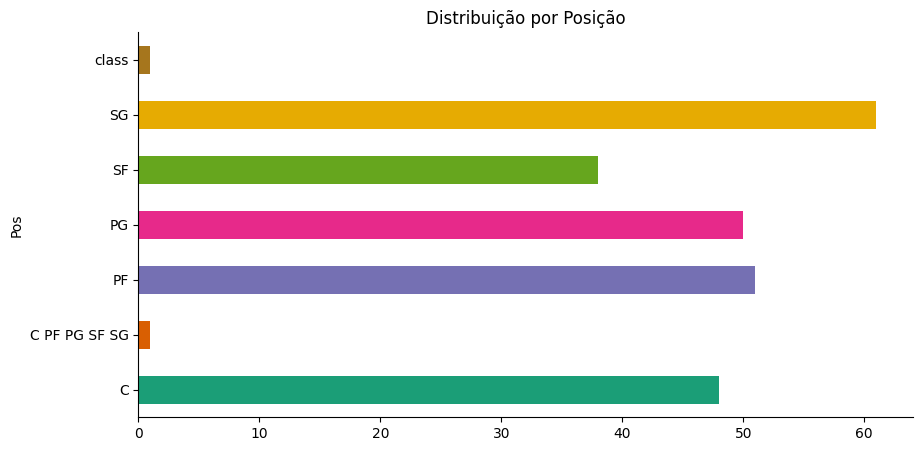

In [ ]:
# Gráfico da distribuição de Pos antes de converter para dummies
plt.figure(figsize=(10, 5))
base_dados.groupby('Pos').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Distribuição por Posição')
plt.show()

In [ ]:

# Prepara os dados
# Remover colunas 'Tm' e 'Pos'
dados = base_dados.drop(columns=['Tm', 'Pos'])
alvo = base_dados['Tm']


In [ ]:

# Converte dados categóricos para dummies (One-Hot Encoding)
dados = pd.get_dummies(dados)


In [ ]:

# Converte o alvo para categórico (se necessário, pode-se usar LabelEncoder se houver muitas classes)
alvo = pd.get_dummies(alvo)


In [ ]:
# Normaliza os dados de entrada
scaler = StandardScaler()
dados = scaler.fit_transform(dados)

In [ ]:
# Separa dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(dados, alvo, test_size=0.20, random_state=42)

In [ ]:

# Constrói o modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(x_train.shape[1],)),  # Define o input shape com base no número de features
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(alvo.shape[1], activation='softmax')  # Mudança para softmax para multiclasse
])


In [ ]:

# Compila o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Para multiclasse
              metrics=['accuracy'])


In [ ]:


# Treina o modelo
model.fit(x_train, y_train, epochs=50)

# Avalia o modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Acurácia: {accuracy:.4f}')

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0490 - loss: 3.8112
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3571 - loss: 2.6994
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7841 - loss: 1.9343
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9215 - loss: 1.3798
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9754 - loss: 0.8989 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9963 - loss: 0.5797 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.3676 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.2020
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1614
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.1014 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0646 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0604
E

In [152]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0533 - loss: 3.6197    


[3.5747499465942383, 0.07999999821186066]

In [156]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Faz previsões no conjunto de teste.
previsoes_prob = model.predict(x_test)

# Converte as probabilidades previstas em rótulos de classe.
previsoes = np.argmax(previsoes_prob, axis=1)

# Converte y_test de one-hot encoding para índices de classe.
y_test_classes = np.argmax(y_test.values, axis=1)  # Se y_test for um DataFrame do pandas, use .values

# Calcula a matriz de confusão.
matrix = confusion_matrix(y_test_classes, previsoes)

print(matrix)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 